<a href="https://colab.research.google.com/github/ddenebb/SkLearn_Train_Test/blob/main/Tasca_M5_T02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Description
Train-Test exercises with ScikitLearn from a dataset with information about housing in Houston.

#- Exercise 1

Split the attached data set in train and test. Study the two sets separately, on a descriptive level.

Also attached you will find a description of the different variables of the dataset.

In [2]:
from google.colab import drive
drive.mount('/content/drive')
images_dir = '/content/gdrive/My Drive/Images'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import warnings

warnings.filterwarnings('ignore')

path = "/content/drive/MyDrive/Google Colab DS IT Academy/Sprint 5/Data/housing data.csv"
col_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df = pd.read_csv(path, names=col_names)
print(df.info(memory_usage='deep'))
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class" attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.


Create a new variable called "X" that contains all the columns of the original dataframe "df", except for the column "MEDV".
Create a new variable called "y" that contains only the values of the column "MEDV" from the original dataframe "df". This column represents the target variable of the dataset, which is the variable we want to predict.
Split he dataset in 80% train and 20% test


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop("MEDV", axis=1) # atributos
y = df["MEDV"] # variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Describe the train batch

In [7]:
X_train.describe()
y_train.describe()


count    404.000000
mean      22.796535
std        9.332147
min        5.000000
25%       16.950000
50%       21.600000
75%       26.400000
max       50.000000
Name: MEDV, dtype: float64

Describe the test batch

In [8]:
X_test.describe()
y_test.describe()

count    102.000000
mean      21.488235
std        8.605804
min        5.000000
25%       17.125000
50%       20.150000
75%       24.075000
max       50.000000
Name: MEDV, dtype: float64

#- Exercise 2
Apply some transformation process (standardize numerical data, create dummy columns, polynomials...).

Standardizing numerical data: This technique is used to normalize the numerical data by subtracting the mean and dividing by the standard deviation. This is often done to ensure that the numerical data has a mean of 0 and a standard deviation of 1, which can help the model converge faster and improve its performance.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Describe the scaled train batch

In [12]:
X_train_summary = pd.DataFrame(X_train).describe()
X_train_summary

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4.040000e+02,404.000000,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-2.638154e-17,0.000000,-4.177077e-17,1.319077e-17,-5.111423e-16,-2.616169e-16,-4.858600e-16,5.248827e-17,-9.453384e-17,-1.516938e-16,8.519038e-16,-4.946538e-16,-1.791746e-16
std,1.001240e+00,1.001240,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.061414e-01,-0.500320,-1.487791e+00,-2.780887e-01,-1.458711e+00,-3.461733e+00,-2.348206e+00,-1.258391e+00,-9.740476e-01,-1.307684e+00,-2.568944e+00,-3.892249e+00,-1.510559e+00
25%,-3.979761e-01,-0.500320,-8.502733e-01,-2.780887e-01,-8.887828e-01,-6.003488e-01,-8.228264e-01,-8.081981e-01,-6.243599e-01,-7.533563e-01,-6.821011e-01,2.098797e-01,-8.005057e-01
50%,-3.776748e-01,-0.500320,-3.521669e-01,-2.780887e-01,-1.572334e-01,-1.494427e-01,3.270201e-01,-2.971196e-01,-5.077973e-01,-4.460660e-01,1.714705e-01,3.830012e-01,-2.157763e-01
75%,-4.582119e-02,0.364589,1.033237e+00,-2.780887e-01,6.338607e-01,4.528240e-01,8.974727e-01,7.481981e-01,3.081406e-01,1.578434e+00,8.453428e-01,4.316600e-01,5.513070e-01
max,9.630689e+00,3.824227,2.433163e+00,3.595975e+00,2.675394e+00,3.477564e+00,1.124581e+00,3.907900e+00,1.706891e+00,1.849573e+00,1.653990e+00,4.441800e-01,3.592534e+00


Describe the scaled test batch

In [13]:
X_test_summary = pd.DataFrame(X_test).describe()
X_test_summary

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.002462,-0.044123,0.109307,-0.050203,-0.075497,-0.218831,0.003276,-0.030652,0.111584,0.125688,0.305805,0.021464,0.136714
std,0.841556,1.041491,0.976256,0.916046,0.923813,0.936848,1.033283,0.944640,1.067933,1.069264,0.808906,0.991129,1.020140
min,-0.406450,-0.500320,-1.528453,-0.278089,-1.399166,-3.887942,-2.230181,-1.239834,-0.974048,-1.301658,-2.389244,-3.822705,-1.348623
25%,-0.397307,-0.500320,-0.709046,-0.278089,-0.920682,-0.628927,-0.885415,-0.725479,-0.624360,-0.736787,0.036696,0.204932,-0.671661
50%,-0.383485,-0.500320,-0.057369,-0.278089,-0.208272,-0.205189,0.219725,-0.213661,-0.507797,-0.355687,0.396095,0.392842,-0.017229
75%,0.103039,-0.500320,1.033237,-0.278089,0.553050,0.230546,0.953803,0.449420,1.706891,1.578434,0.845343,0.444180,0.782946
max,4.753684,3.608000,2.433163,3.595975,2.675394,2.424744,1.124581,3.242576,1.706891,1.849573,1.653990,0.444180,3.453128


Plot a scatter matrix of the scaled train batch

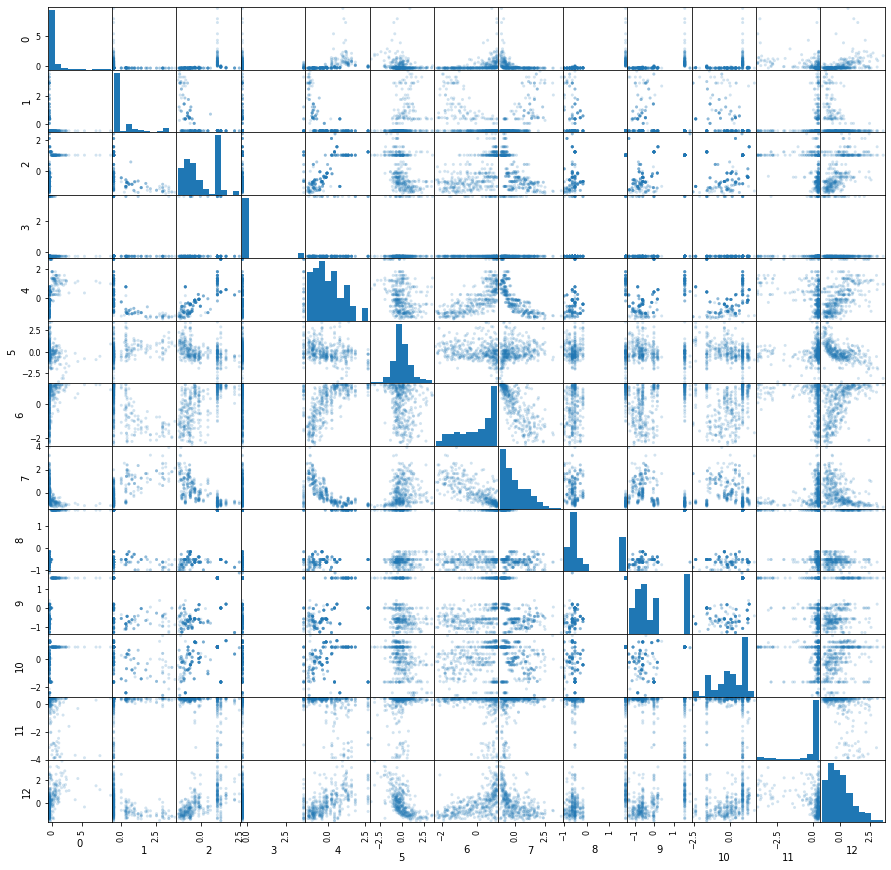

In [24]:
from pandas.plotting import scatter_matrix
scatter_matrix(pd.DataFrame(X_train), alpha=0.2, figsize=(15, 15));

Plot a scatter matrix of the scaled test batch

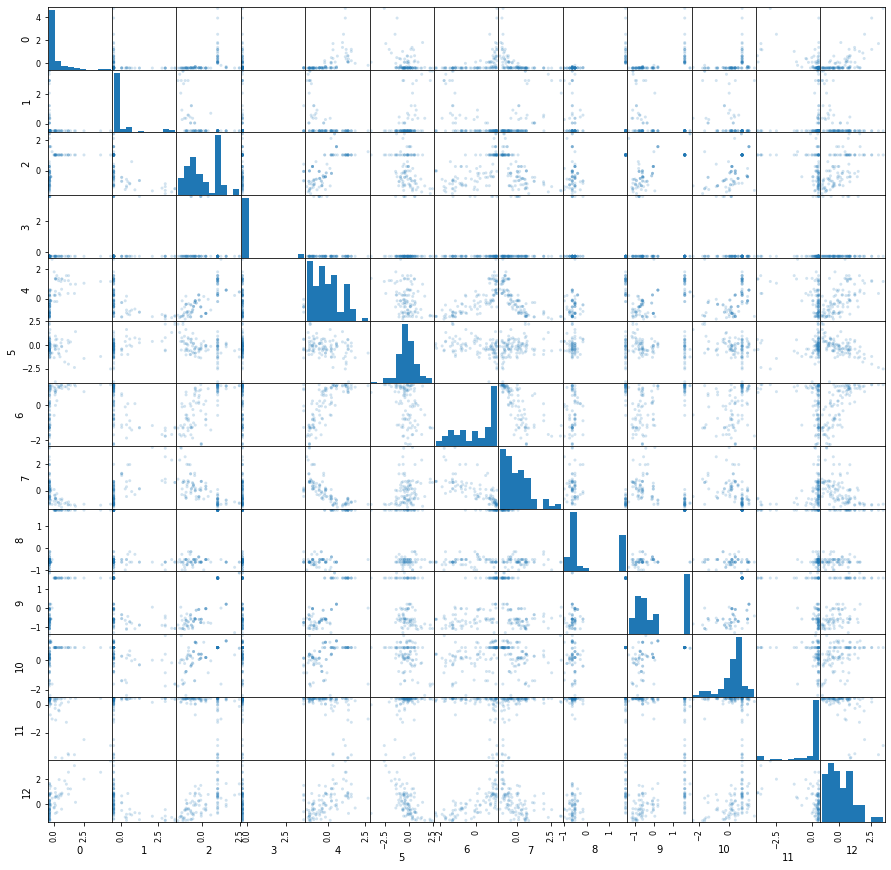

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(pd.DataFrame(X_test), alpha=0.2, figsize=(15, 15));

Another transformation: we will create an instance of the "PolynomialFeatures" class and set the degree parameter to 2, indicating that we want to add polynomial terms of degree 2 to the attributes.

The "fit_transform" method is used to fit the PolynomialFeatures transformer to the training set and then transform the training set to add the polynomial terms.

The "transform" method is used to transform the testing set, adding the polynomial terms.

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#- Exercise 3

Summarize the newly generated columns statistically and graphically.

In [15]:
X_train_poly_summary = pd.DataFrame(X_train_poly).describe()
X_train_poly_summary 

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
count,404.0,4.040000e+02,404.000000,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,...,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,1.0,-2.638154e-17,0.000000,-4.177077e-17,1.319077e-17,-5.111423e-16,-2.616169e-16,-4.858600e-16,5.248827e-17,-9.453384e-17,...,1.000000,0.444836,-0.442027,0.530632,1.000000,-0.173958,0.360167,1.000000,-0.340873,1.000000
std,0.0,1.001240e+00,1.001240,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,...,0.979027,0.740876,1.355079,1.026284,1.223115,0.936538,0.956506,2.999513,1.194250,1.574688
min,1.0,-4.061414e-01,-0.500320,-1.487791e+00,-2.780887e-01,-1.458711e+00,-3.461733e+00,-2.348206e+00,-1.258391e+00,-9.740476e-01,...,0.000039,-0.951153,-6.143659,-2.713200,0.000068,-3.620461,-3.907861,0.000061,-9.539536,0.000015
25%,1.0,-3.979761e-01,-0.500320,-8.502733e-01,-2.780887e-01,-8.887828e-01,-6.003488e-01,-8.228264e-01,-8.081981e-01,-6.243599e-01,...,0.198975,-0.040248,-0.340490,0.002279,0.156891,-0.334655,-0.053634,0.110691,-0.345337,0.125307
50%,1.0,-3.776748e-01,-0.500320,-3.521669e-01,-2.780887e-01,-1.572334e-01,-1.494427e-01,3.270201e-01,-2.971196e-01,-5.077973e-01,...,0.585848,0.241198,-0.195117,0.341773,0.714604,-0.011409,0.238670,0.167929,-0.151444,0.500156
75%,1.0,-4.582119e-02,0.364589,1.033237e+00,-2.780887e-01,6.338607e-01,4.528240e-01,8.974727e-01,7.481981e-01,3.081406e-01,...,2.491455,1.334318,0.000913,0.797292,1.451402,0.267835,0.811337,0.197296,0.059788,1.181704
max,1.0,9.630689e+00,3.824227,2.433163e+00,3.595975e+00,2.675394e+00,3.477564e+00,1.124581e+00,3.907900e+00,1.706891e+00,...,3.420920,2.631402,0.821543,5.670579,6.599472,4.768302,4.001887,15.149599,1.595732,12.906297


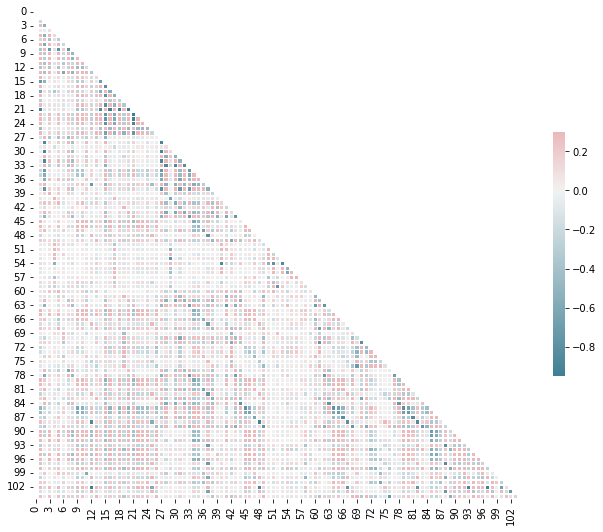

In [17]:
# Compute the correlation matrix
corr = pd.DataFrame(X_train_poly).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


In [18]:
X_test_poly_summary = pd.DataFrame(X_test_poly).describe()
X_test_poly_summary 

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
count,102.0,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,...,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,1.0,0.002462,-0.044123,0.109307,-0.050203,-0.075497,-0.218831,0.003276,-0.030652,0.111584,...,1.147915,0.499365,-0.466097,0.651963,0.741430,-0.162346,0.393041,0.973167,-0.468698,1.049173
std,0.0,0.841556,1.041491,0.976256,0.916046,0.923813,0.936848,1.033283,0.944640,1.067933,...,1.035835,0.769003,1.413838,1.193411,0.871464,0.835187,0.869749,3.027567,1.701616,1.805766
min,1.0,-0.406450,-0.500320,-1.528453,-0.278089,-1.399166,-3.887942,-2.230181,-1.239834,-0.974048,...,0.000039,-0.951153,-6.033889,-1.186308,0.000068,-3.231496,-1.604096,0.000298,-11.049367,0.000273
25%,1.0,-0.397307,-0.500320,-0.709046,-0.278089,-0.920682,-0.628927,-0.885415,-0.725479,-0.624360,...,0.341813,-0.089018,-0.393174,-0.020070,0.104137,-0.209068,-0.102143,0.114646,-0.364951,0.143528
50%,1.0,-0.383485,-0.500320,-0.057369,-0.278089,-0.208272,-0.205189,0.219725,-0.213661,-0.507797,...,0.682041,0.257159,-0.226408,0.370436,0.714604,0.051212,0.110709,0.183135,-0.118444,0.500872
75%,1.0,0.103039,-0.500320,1.033237,-0.278089,0.553050,0.230546,0.953803,0.449420,1.706891,...,2.491455,1.334318,-0.007859,1.128453,0.714604,0.263678,0.672868,0.197296,0.098289,1.210372
max,1.0,4.753684,3.608000,2.433163,3.595975,2.675394,2.424744,1.124581,3.242576,1.706891,...,3.420920,2.015891,0.701109,5.450536,5.708489,1.676627,3.127988,14.613071,1.134137,11.924092


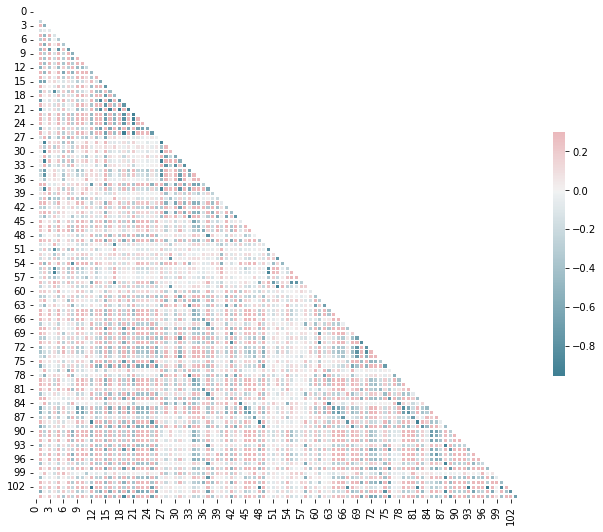

In [19]:
# Compute the correlation matrix
corr = pd.DataFrame(X_test_poly).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()